In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import r2_score
import scipy.interpolate as interp
plt.rcParams.update({'font.size': 15})

In [2]:
files=r'C:\Users\Kenne\Desktop\McMurdoNaTemp2020MY26.txt'
data=np.loadtxt(files)
time=data[0,1:]
alt=data[1:,0]
data[0,0]

20200526.0

Above: figured out how to read in Xinzhao lidar data set.
Below: plotted temp as function of time and altitude.

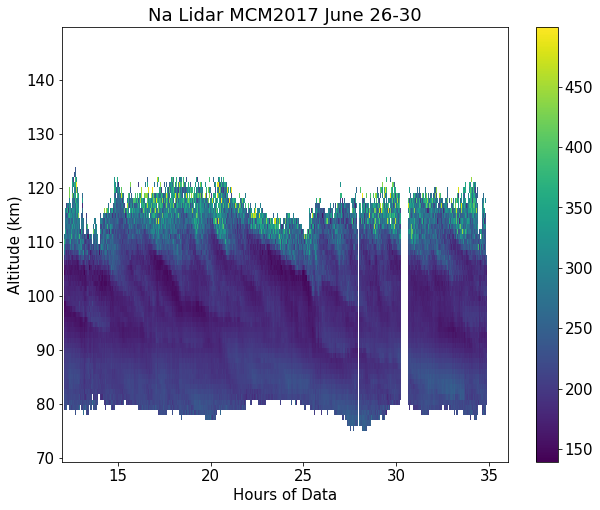

In [3]:
plt.figure(figsize=(10,8))
plt.title('Na Lidar MCM2017 June 26-30')
plt.xlabel('Hours of Data')
plt.ylabel('Altitude (km)')
plt.pcolormesh(time,alt,data[1:,1:], shading='auto')
plt.colorbar()

Now to do same procedure with the error data set.

In [4]:
file_err=r'C:\Users\Kenne\Desktop\McMurdoNaTempErr2020MY26.txt'
data_err=np.loadtxt(file_err)
time_err=data[0,1:]
alt_err=data[1:,0]
data_err[0,0]

20200526.0

Lidar temp plot with error contrours placed ontop to get idea of when/where errors get large.

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Na Lidar ERRROR MCM2017 June 26-30')
plt.xlabel('Hours of Data')
plt.ylabel('Altitude (km)')
levels=np.linspace(np.nanmin((data_err[1:,1:])),np.nanmin((data_err[1:,1:])+10),10)
plt.pcolormesh(time,alt,data[1:,1:], cmap='hot', shading='auto')
plt.colorbar()
plt.contour(time_err,alt_err,(data_err[1:,1:]),levels)
plt.colorbar()


Loading in zenith data for same time frame and dt of 2.5min

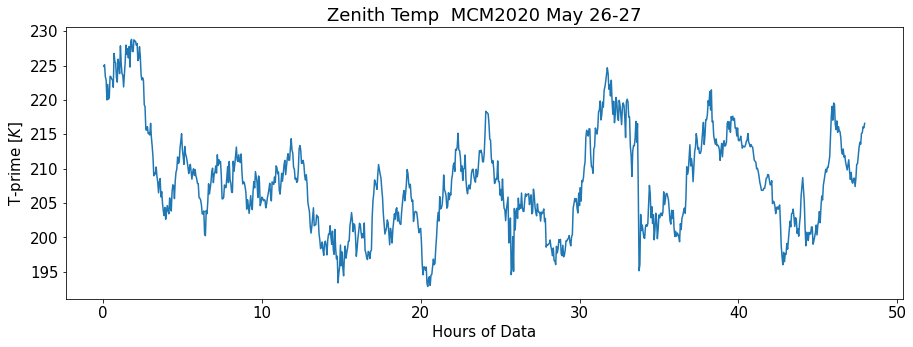

In [6]:
zenith_path=r"C:\Users\kenne\Desktop\zenith5pix.csv"
zenith_data=pd.read_csv(zenith_path)
zenith_data=zenith_data.values
plt.figure(figsize=(15,5))
plt.title('Zenith Temp  MCM2020 May 26-27')
plt.xlabel('Hours of Data')
plt.ylabel('T-prime $[K]$')
#plt.plot(zenith_data[:,0],zenith_data[:,1])
plt.plot(zenith_data[:,0],zenith_data[:,1])

In [7]:
zenith_interp = interp.interp1d(np.arange(np.size(zenith_data[:,1])),zenith_data[:,1])
zenith_lidar = zenith_interp(np.linspace(0,np.size(zenith_data[:,1])-1,np.size(time)))

Interpolated zenith data to fit size of lidar data set

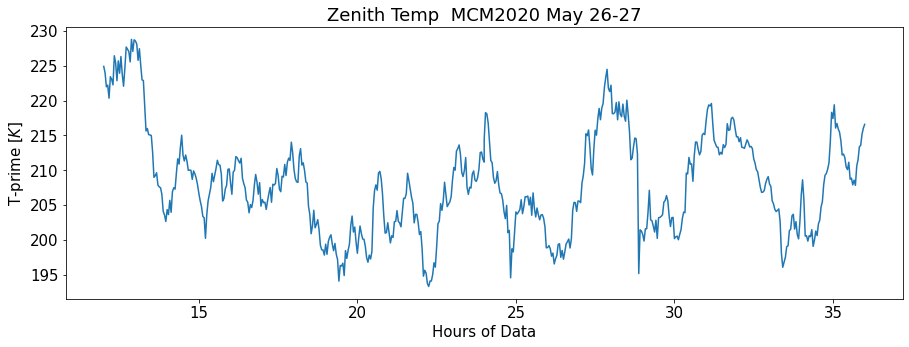

In [10]:
plt.figure(figsize=(15,5))
plt.title('Zenith Temp  MCM2020 May 26-27')
plt.xlabel('Hours of Data')
plt.ylabel('T-prime $[K]$')
#plt.plot(zenith_data[:,0],zenith_data[:,1])
plt.plot(time,zenith_lidar)

(0.0, -200.0)

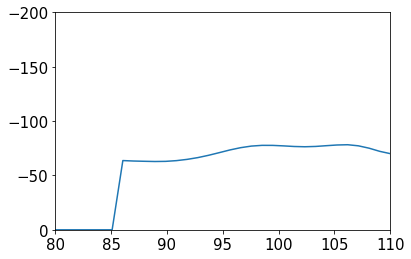

In [42]:
r2=np.zeros(np.size(alt[2:-2]))
a=np.zeros(np.size(data[4,1:]))
from numpy import *

where_are_NaNs = isnan(data)
data[where_are_NaNs] = 0


for i in range (15,np.size(alt)-4):
    for j in range (1,np.size(time)):
        a[j]=np.nanmean(data[i-2:i+2,j])
    r2[i]=r2_score(zenith_lidar,a,multioutput='variance_weighted')
    
plt.plot(alt[2:-2],r2)
plt.xlim(80,110)
plt.ylim(0,-200)


In [43]:
alt[3]-alt[2]

0.9593359999999933

In [29]:
np.nanmean(data[1:2,1:])

0.0